# **Tele Communication Customer Churn Analysis**

`Dataset Info: Sample dataset containing Telco customer data and showing customers left last month`

# **Data Collection**

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data file
churn_df = pd.read_csv('/content/drive/MyDrive/ML Projects Workflow/Telco-Customer-Churn.csv')

In [3]:
# Number of rows and columns
churn_df.shape

(7043, 21)

In [4]:
# Top 2 rows of the dataset
churn_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
# Name of all the columns
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Data Types of all the datapoints within each columns
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Number of datapoints for each columns
churn_df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [8]:
# Check the descriptive statistics of categorical variable
churn_df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [9]:
# Check the descriptive statistics of numerical variable
churn_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# **Inferences**
- SeniorCitizen is actually a categorical feature, hence 25%-50%-75% distribution is not proper.
- 75% Customer have tenure less than 55 Months
- Average Monthly Charges are USD 64.75 whereas 25% customers pay more than USD 89.85 per month

# **1.Check Missing Values**

In [10]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 # **2.Check Duplicated Values**

In [11]:
churn_df.duplicated().sum()

0

# **3.Check Imbalanced Data**

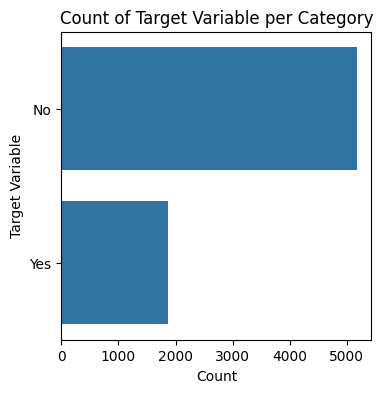

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(data=churn_df['Churn'])
plt.title('Count of Target Variable per Category')
plt.xlabel('Count')
plt.ylabel('Target Variable')
plt.show()

In [13]:
# Check the Churner-Percentage
round((churn_df['Churn'].value_counts()/len(churn_df['Churn']))*100,2)

No     73.46
Yes    26.54
Name: Churn, dtype: float64

## **Inferences:**
- Data is highly imbalanced, ratio = 73:27
- The accuracy of the model will be affected untill we balance this DATA.
- Methods like upsampling and downsampling are used.



# **Missing Values Plot**

<Axes: >

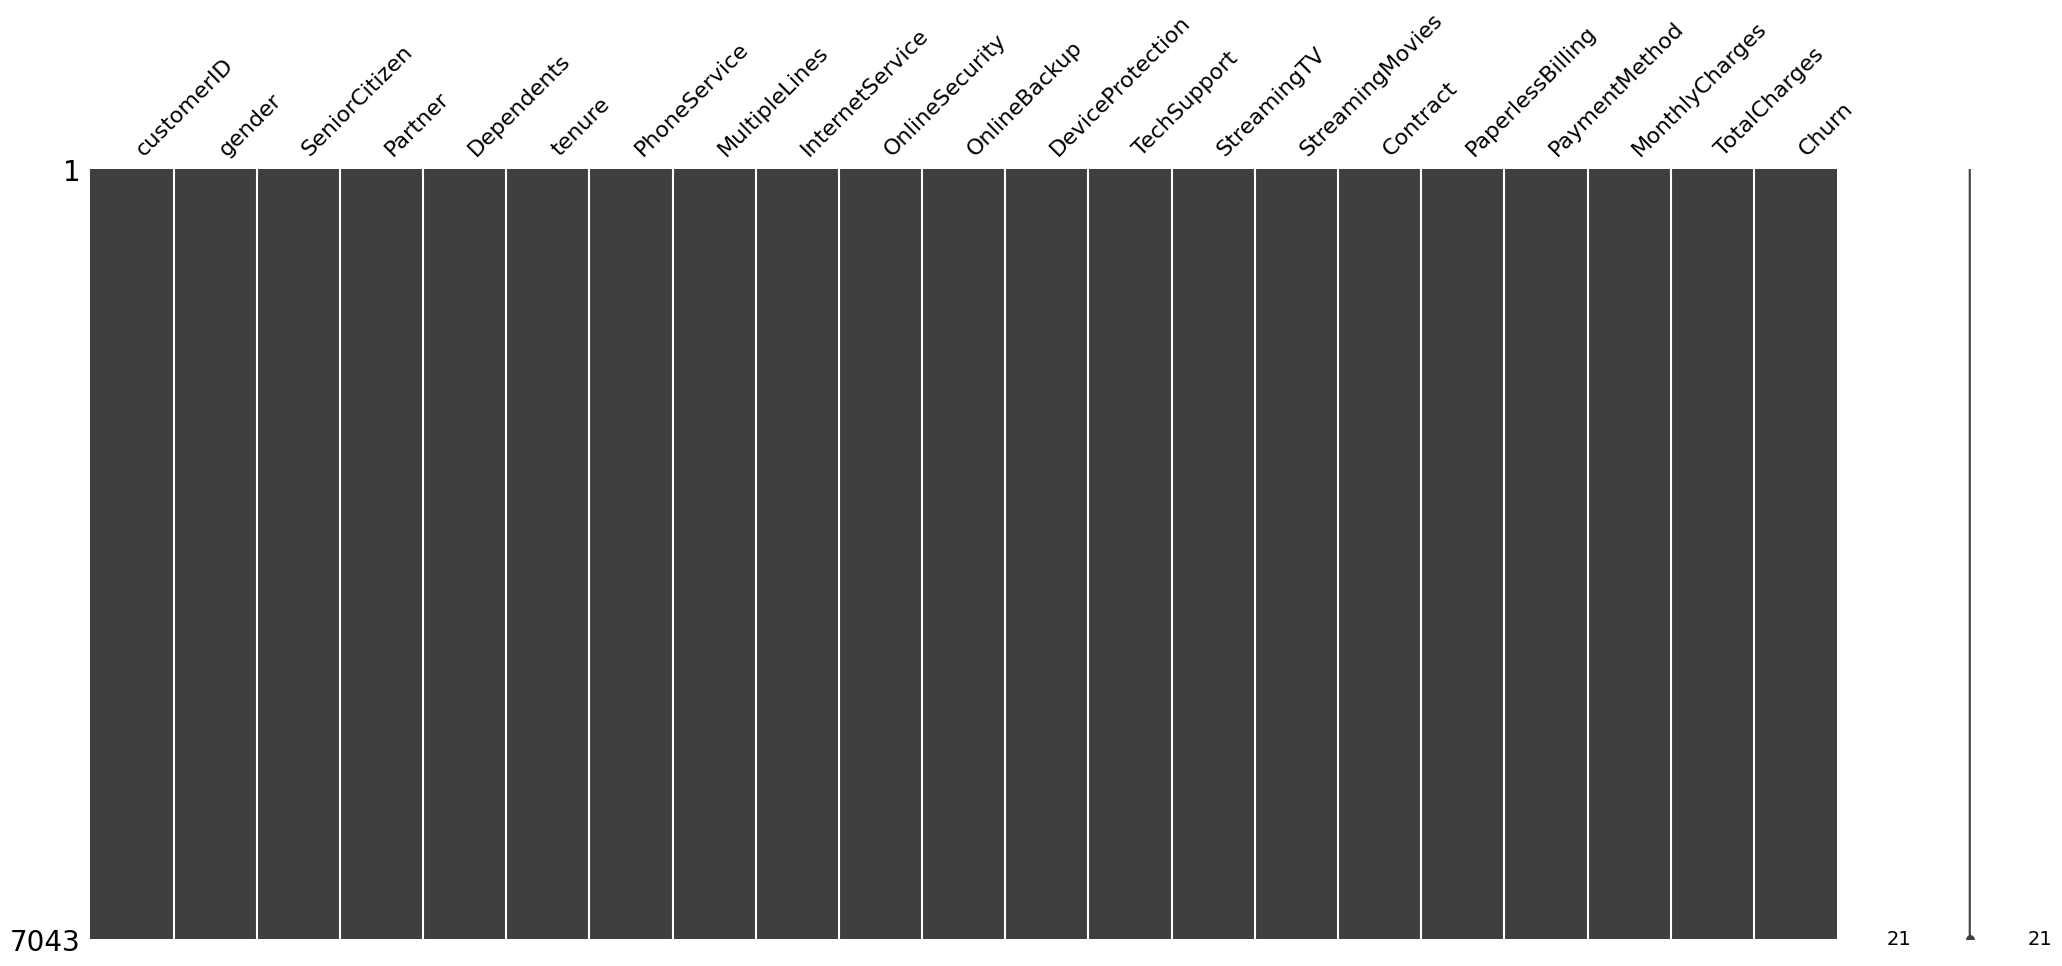

In [14]:
import missingno as msno
msno.matrix(churn_df)

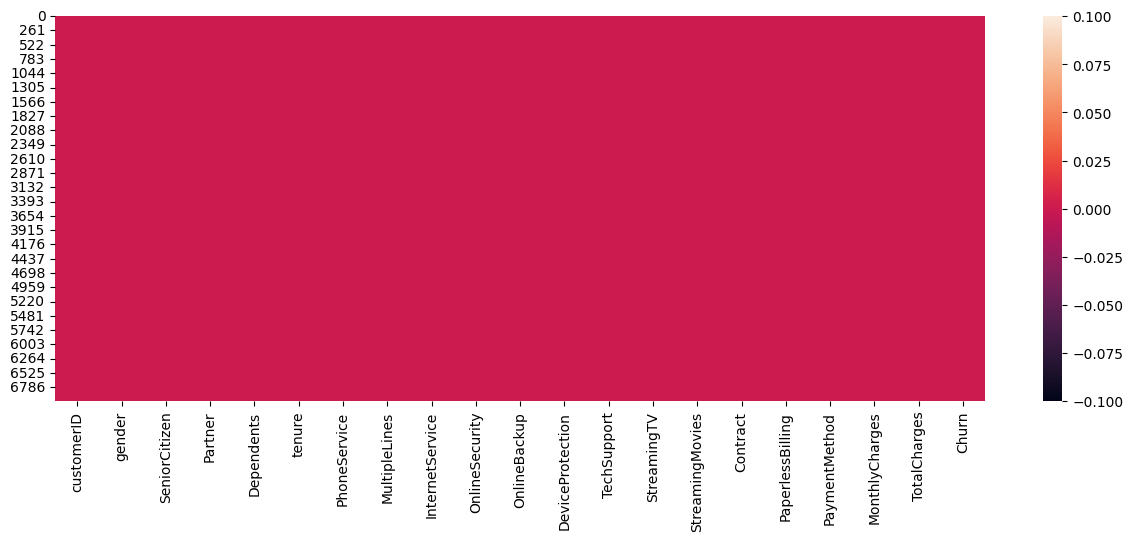

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(data=churn_df.isnull())
plt.show()

# **Inference:**
- Here, we don't have any missing data.

## **General Thumb Rules:**
- For features with less missing values - we can use regression to predict the missing values or fill with the mean of the values present, dependin on the features.
- For features with very high number of missing values - it is better to drop those columns as they give very less insight on analysis.

# **Data Cleaning:**

In [16]:
# Create a copy of base data for manupulation & processing
churn_data = churn_df.copy()

In [17]:
# Convert the certain features into valid data types

churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [18]:
# Check for null values
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### **Remark:** As we can see there are 11 missing values in TotalCharges column. Let's check these records.

In [19]:
churn_data.isnull().sum()/churn_data.count()*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156428
Churn               0.000000
dtype: float64

In [20]:
missing = churn_data.loc[churn_data['TotalCharges'].isnull()==True]
missing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# **Missing Value Treatment**

`Note: Since the % of missing values as compared to total dataset is very low i.e.0.15%, it is safe to ignore them from further processing.`

In [21]:
# Removing missing values - We will be deleteling those rows
churn_data.dropna(how='any', inplace=True)

In [22]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Divide customers into bins based on tenure e.g. for tenure<12 months : assign a tenure group 1-12 & 13-24 and so on ..

In [23]:
# Get the maximum tenure
churn_data['tenure'].max()

72

### **Feature Binning**

In [24]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]

churn_data['tenure_group'] = pd.cut(churn_data['tenure'], bins=range(1,80,12),
                                    labels=labels, right=False,
                                    precision=3, duplicates='raise')

churn_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [25]:
# Drop the columns that you don't need
churn_data.drop(columns=['tenure','customerID'], axis=1, inplace=True)

In [26]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# **Data Exploration**

### **1.Univariate Analysis**

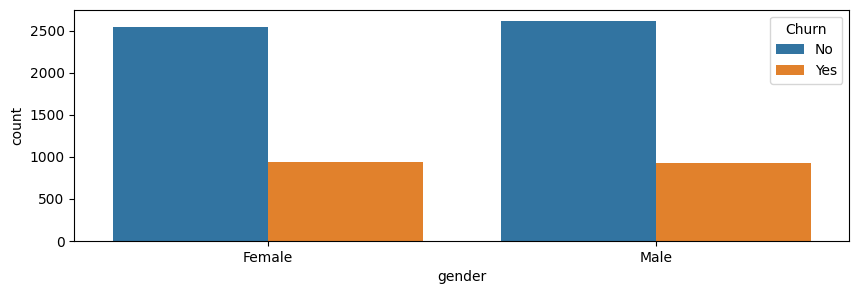

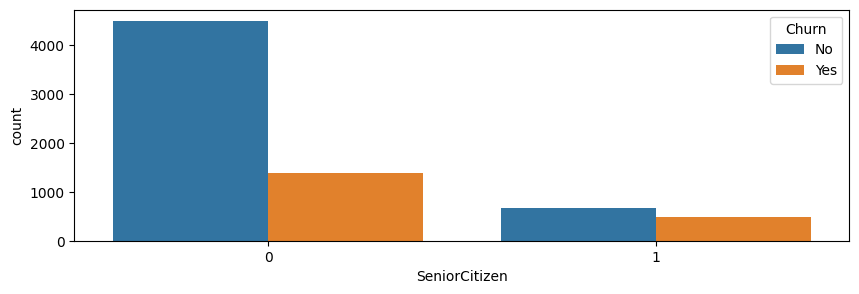

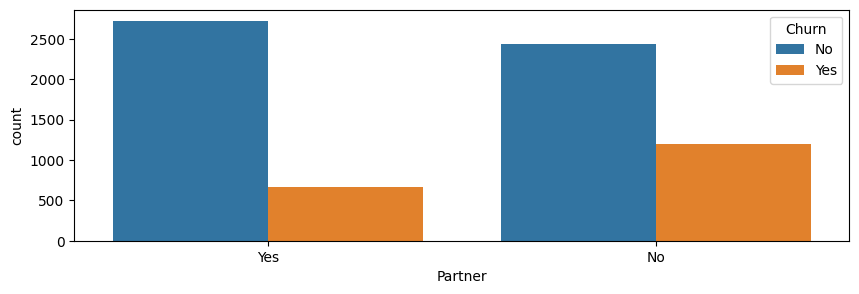

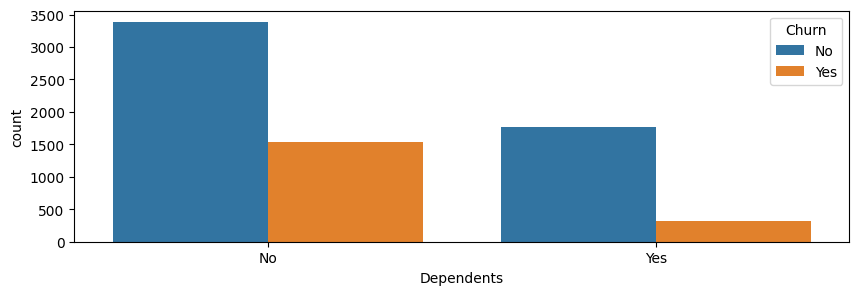

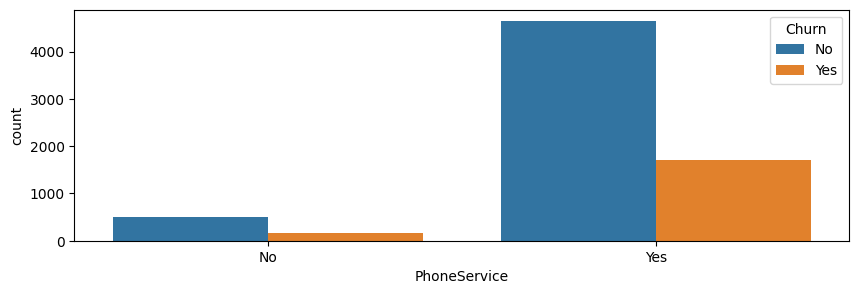

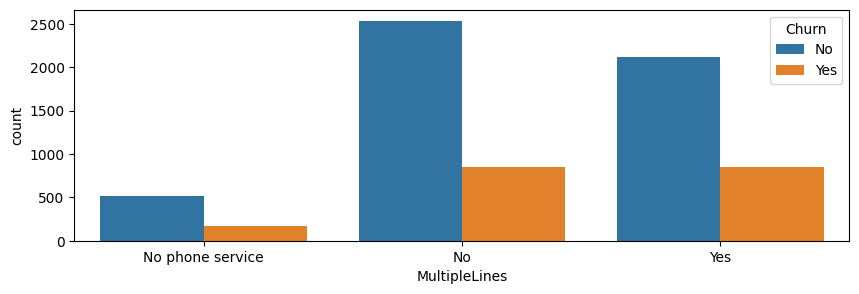

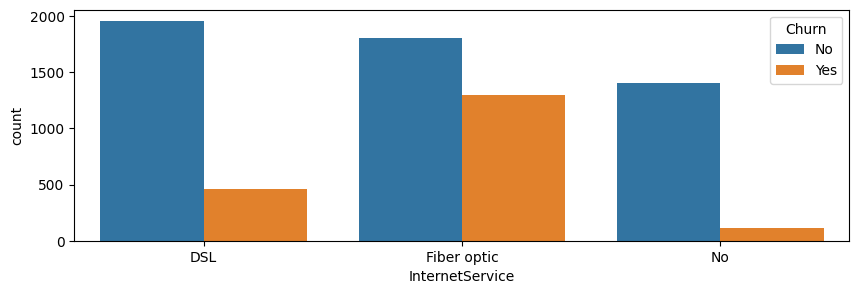

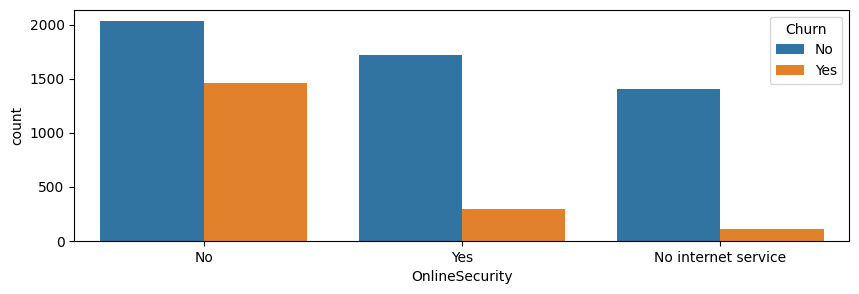

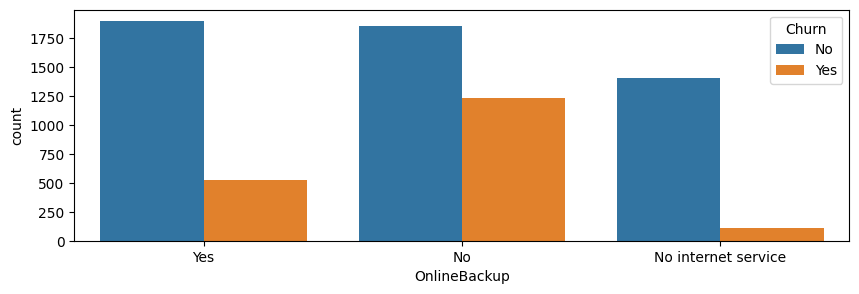

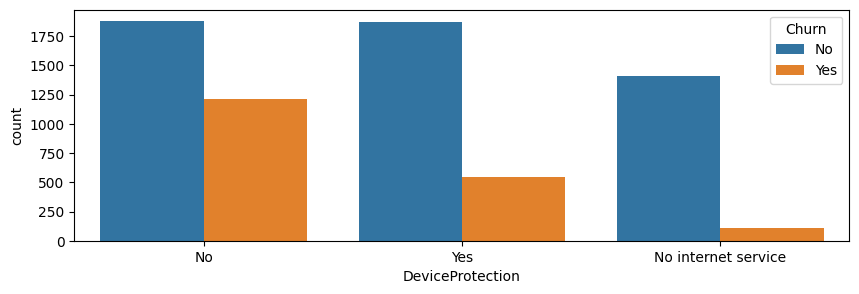

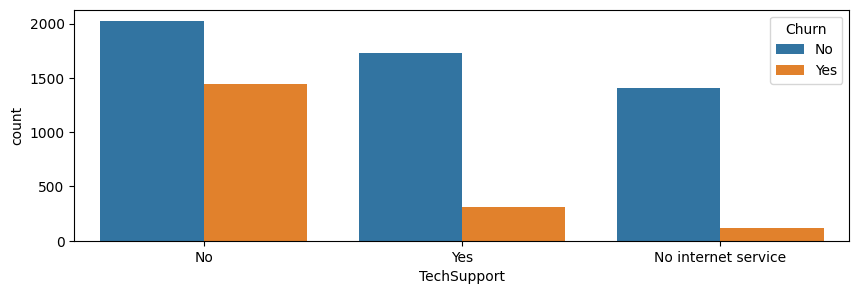

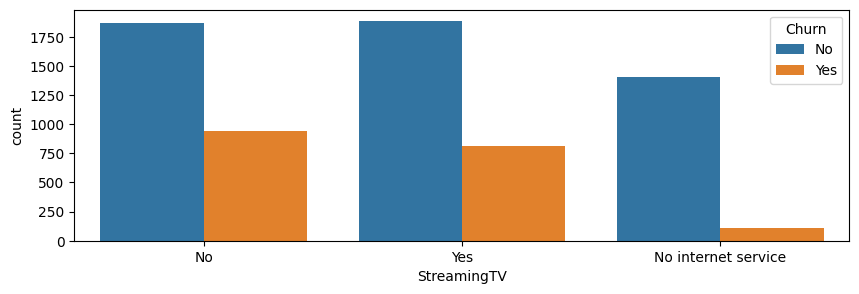

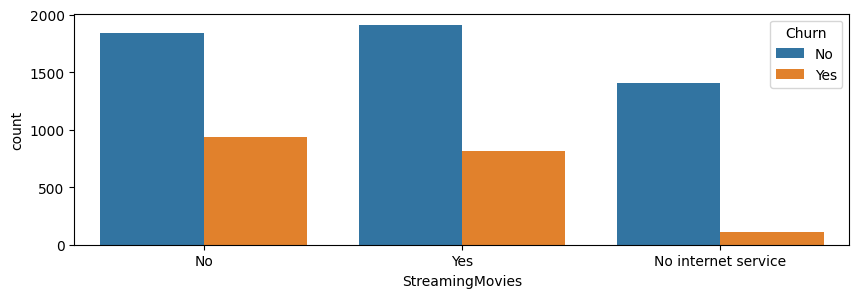

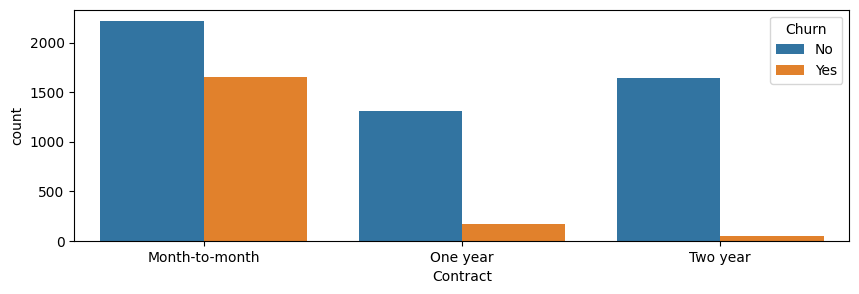

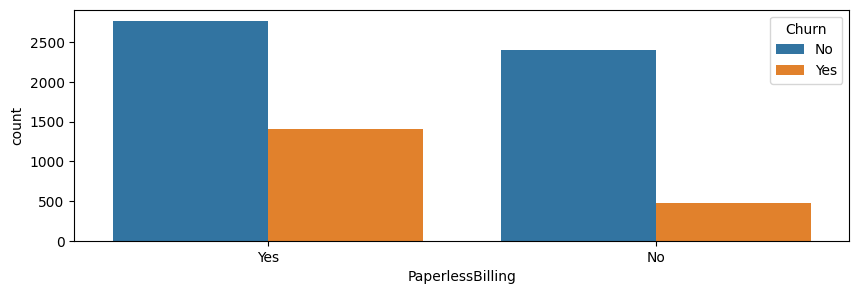

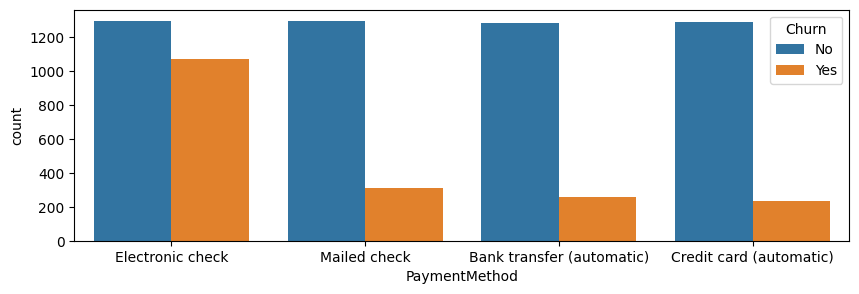

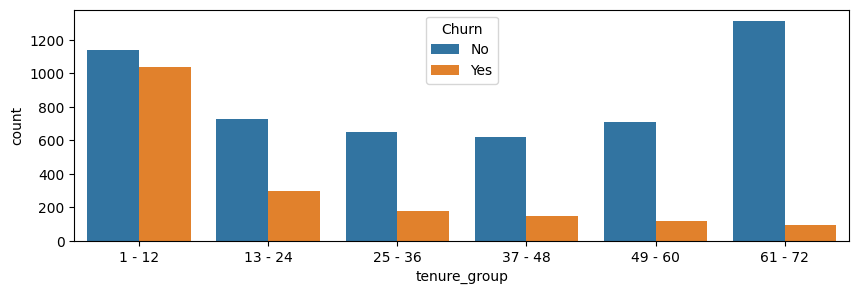

In [27]:
for i,cols in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']):
  plt.figure(figsize=(10,3))
  sns.countplot(x=cols, data = churn_data, hue='Churn', orient='h')
  plt.show()

### **2.Convert the target variable 'Churn' in to a binary numeric variable i.e. Yes =1, No =0**

### **Label Encoding**

In [28]:
churn_data['Churn'].replace({'Yes':1,'No':0}, inplace=True)

In [29]:
churn_data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### **3.Convert all categorical variable into numerical**

In [30]:
num_churn_data = churn_data.copy()
num_churn_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36


### **One Hot Encoding**

In [31]:
num_churn_data = pd.get_dummies(num_churn_data)

In [32]:
num_churn_data.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


### **4.Relationship between Monthly Charges and Total Charges**

**lmplot()** is a function from the seaborn library used for drawing a linear regression model with a scatter plot. It is used to explore the relationship between two quantitative variables in a dataset.

**Syntax:**

**seaborn.lmplot**(*x, y, data, hue, col, row, order, size, aspect, markers, scatter_kws, line_kws, legend, legend_out, x_ci, x_estimator, ci, n_boot, units*)

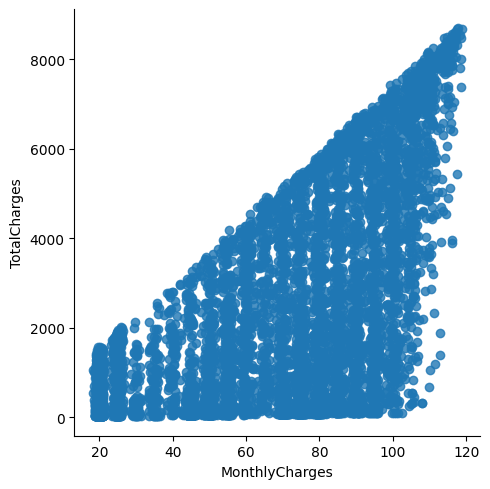

In [33]:
sns.lmplot(data=num_churn_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

### **Note:** *Total Charges increases with Monthly Charges increase- as expected.*

### **5.Churn by Monthly Charges and Total Charges**

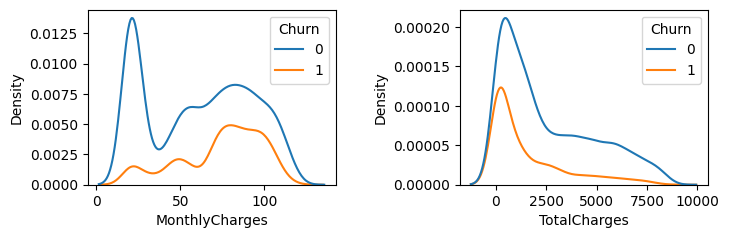

In [34]:
plt.figure(figsize=(8,5))

for i,cols in enumerate(['MonthlyCharges','TotalCharges']):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=cols, data=num_churn_data,hue='Churn')

plt.subplots_adjust(wspace=0.5)
plt.show()


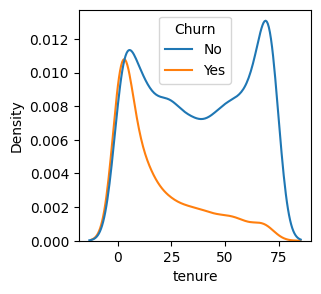

In [35]:
plt.figure(figsize=(3,3))
sns.kdeplot(x='tenure', data=churn_df,hue='Churn')
plt.show()

### **Insights**
- Churn is high when Monthly Charges are high
- Surprised to see higher churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear.
- Higher Monthly Charges at Lower Tenure results into Lower Total Charge , hence causes higer churn.

### **6.Correlation Bar Plot**

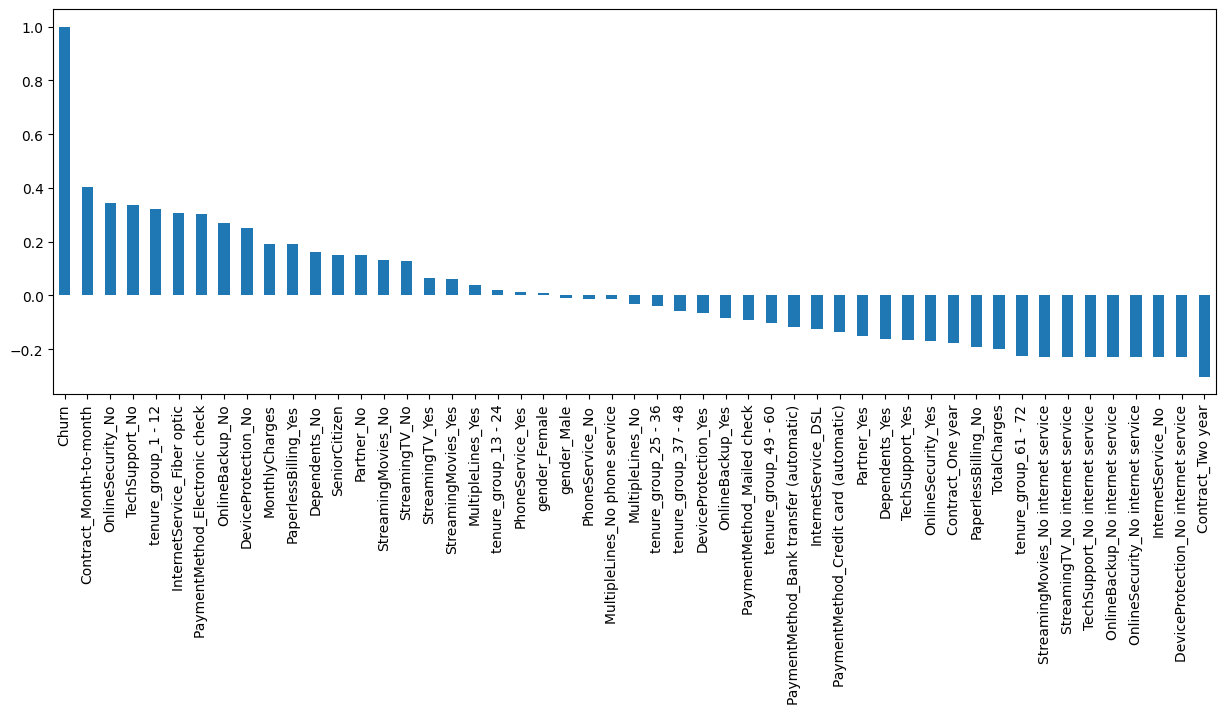

In [36]:
plt.figure(figsize=(15,5))
num_churn_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

### **Insights:**
- HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

- LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

- Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

### **7.Correlation Heatmap Plot**

<function matplotlib.pyplot.show(close=None, block=None)>

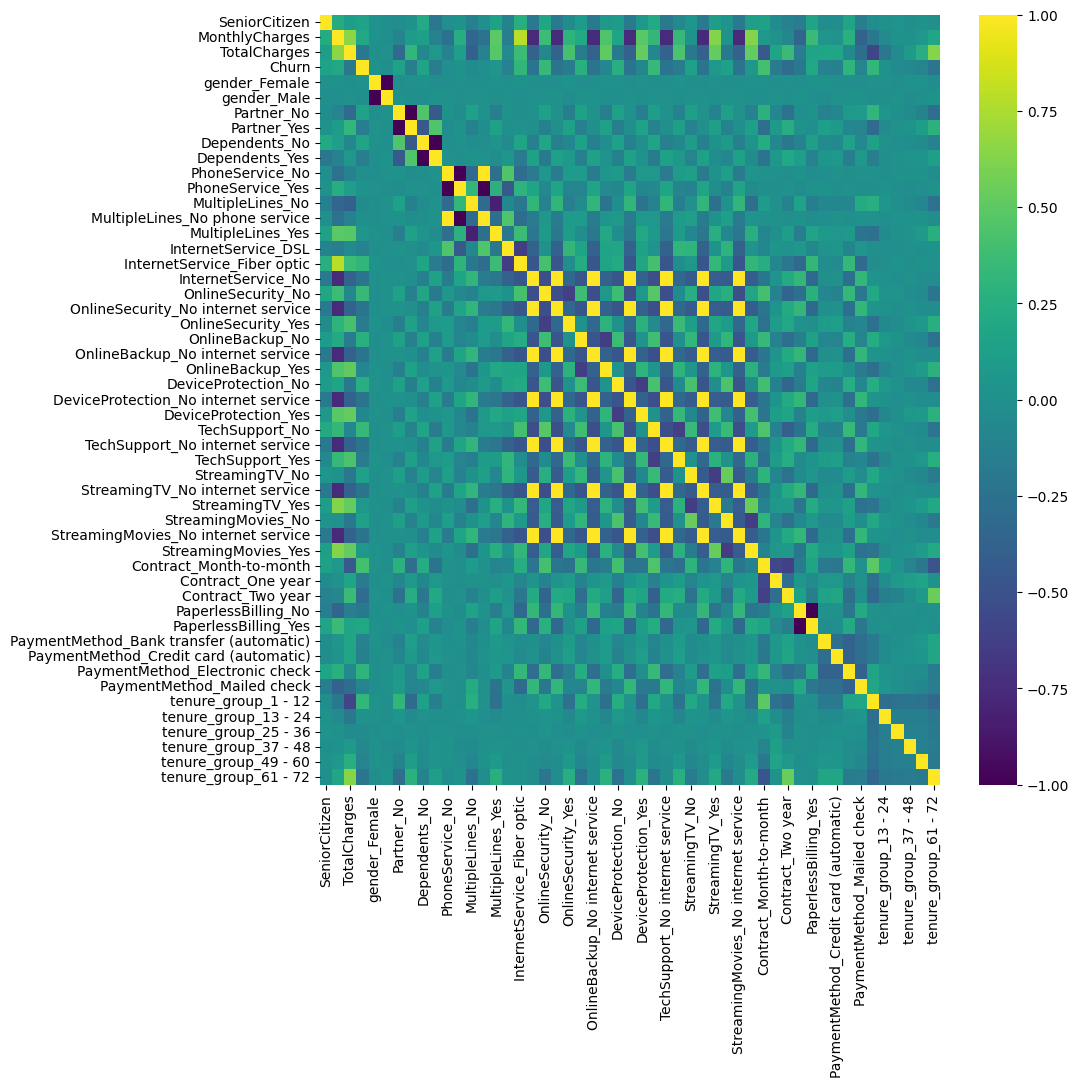

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(data=num_churn_data.corr(), cmap='viridis')
plt.show

### **8.Bivariate Analysis**

In [38]:
df1_target0= churn_df.loc[churn_df['Churn']=='No']
df1_target1= churn_df.loc[churn_df['Churn']=='Yes']

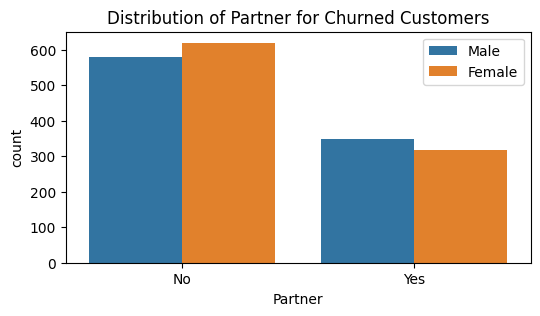

In [39]:
plt.figure(figsize=(6,3))
sns.countplot(x='Partner', data=df1_target1, hue='gender')
plt.title('Distribution of Partner for Churned Customers')
plt.legend(loc='upper right')
plt.show()

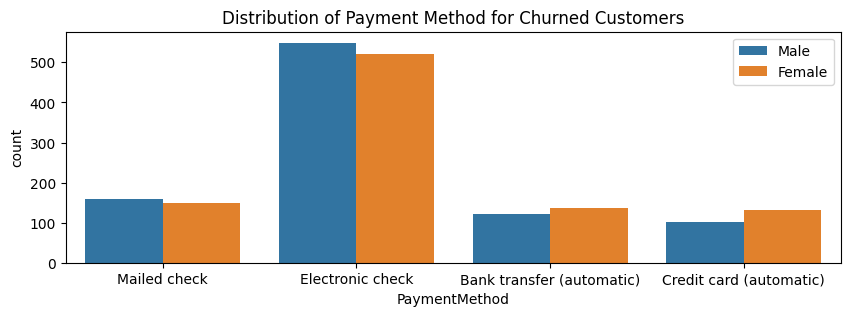

In [40]:
plt.figure(figsize=(10,3))
sns.countplot(x='PaymentMethod', data=df1_target1, hue='gender')
plt.title('Distribution of Payment Method for Churned Customers')
plt.legend(loc='upper right')
plt.show()

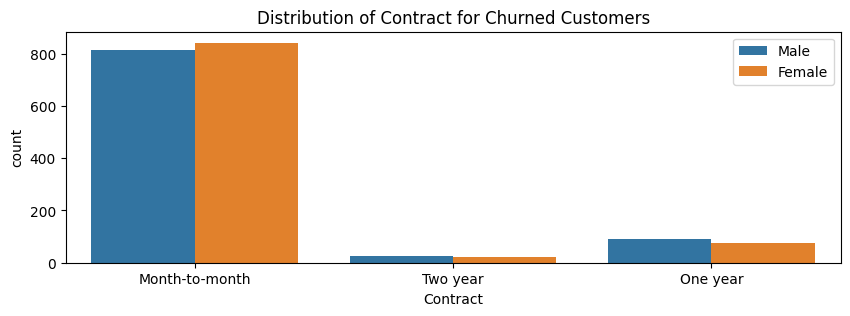

In [41]:
plt.figure(figsize=(10,3))
sns.countplot(x='Contract', data=df1_target1, hue='gender')
plt.title('Distribution of Contract for Churned Customers')
plt.legend(loc='upper right')
plt.show()

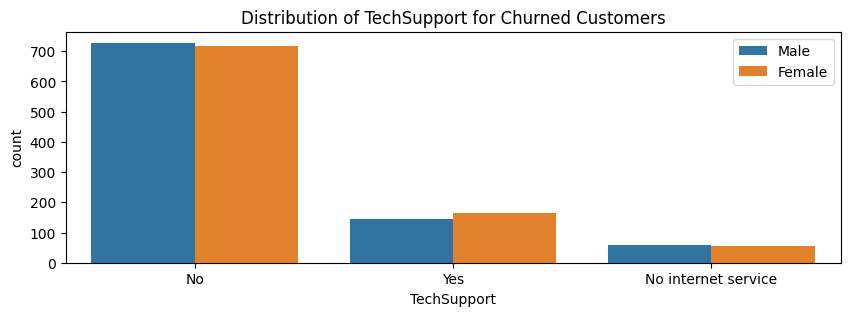

In [42]:
plt.figure(figsize=(10,3))
sns.countplot(x='TechSupport', data=df1_target1, hue='gender')
plt.title('Distribution of TechSupport for Churned Customers')
plt.legend(loc='upper right')
plt.show()

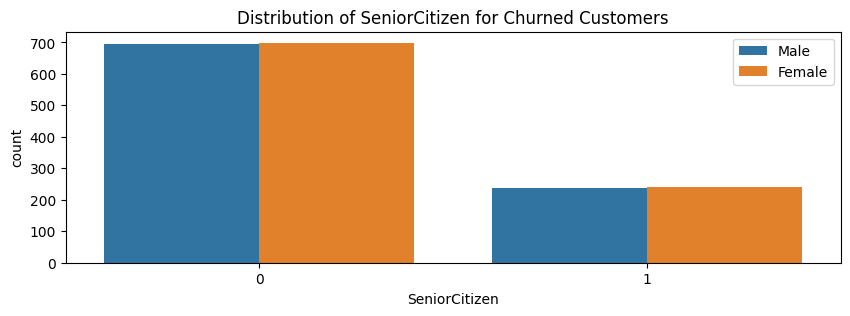

In [43]:
plt.figure(figsize=(10,3))
sns.countplot(x='SeniorCitizen', data=df1_target1, hue='gender')
plt.title('Distribution of SeniorCitizen for Churned Customers')
plt.legend(loc='upper right')
plt.show()

### **Insights:**
- Eletronic check medium are the highest churners.
- Contract Type - Monthly customers are more likely to churn because of  no contract terms, as they are free to go customers.
- No Online Security , No Tech Support category are high churners.
- Non Senior Citizens are high churners

# **8.Outlier Detection & Treatment**

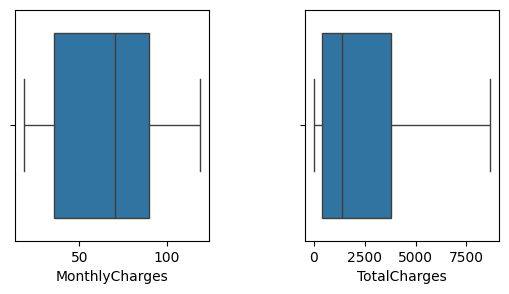

In [44]:
plt.figure(figsize=(10,3))

for i,cols in enumerate(['MonthlyCharges','TotalCharges']):
  plt.subplot(1,3,i+1)
  sns.boxplot(data=churn_data,x=cols,orient='Horizontal')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [45]:
import statistics

def find_anomalies(data):

  anomalies=[]

  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  anomaly_cutoff = random_data_std * 3

  upper_limit = random_data_mean + anomaly_cutoff
  lower_limit = random_data_mean - anomaly_cutoff

  for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)
  return anomalies

In [46]:
outlier1 = find_anomalies(churn_data['MonthlyCharges'])
len(outlier1)

0

In [47]:
outlier2 = find_anomalies(churn_data['TotalCharges'])
len(outlier2)

0

### **Insights:**
- No outliers are detected for the numerical features.

# **9.Distribution and Skewness of Numerical Features**

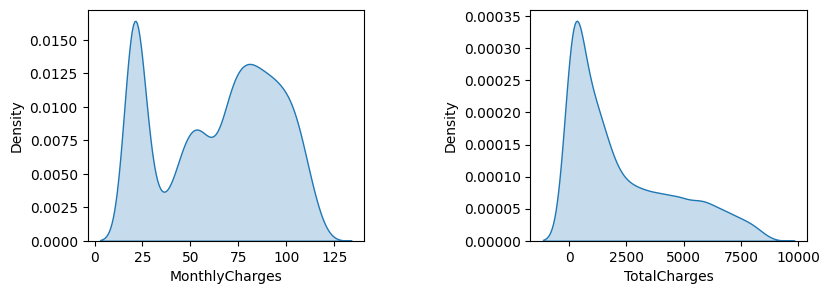

In [48]:
plt.figure(figsize=(15,3))

for i, cols in enumerate(['MonthlyCharges','TotalCharges']):
  plt.subplot(1,3, i+1)
  sns.kdeplot(data=churn_data, x=cols, fill=True)

plt.subplots_adjust(wspace=0.6)
plt.show()

In [49]:
# Checkig the skewness of the Features
for i, cols in enumerate(['MonthlyCharges','TotalCharges']):
  skew = round(churn_data[cols].skew(),2)
  print('Skewness of {} = {}'.format(cols,skew))

Skewness of MonthlyCharges = -0.22
Skewness of TotalCharges = 0.96


# **Splitting btw Independent/Input/Predictor and Dependent/Output/Response Values(X & y)**

In [50]:
X = num_churn_data.drop('Churn',axis=1)
y = num_churn_data['Churn']

In [51]:
X.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [52]:
y.head(3)

0    0
1    0
2    1
Name: Churn, dtype: int64

# **Feature Standardizaion & Normalization**

In [53]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

std_X_data_arr = scaler.fit_transform(X)

std_X_df = pd.DataFrame(std_X_data_arr,columns=[X.columns])


In [55]:
std_X_df.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,-0.440327,-1.161694,-0.994194,1.009430,-1.009430,-1.035617,1.035617,0.652305,-0.652305,3.056334,...,-0.529976,-0.525351,1.404764,-0.543604,1.494357,-0.412843,-0.366324,-0.348613,-0.366324,-0.500133
1,-0.440327,-0.260878,-0.173740,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,...,-0.529976,-0.525351,-0.711863,1.839576,-0.669184,-0.412843,2.729821,-0.348613,-0.366324,-0.500133
2,-0.440327,-0.363923,-0.959649,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,...,-0.529976,-0.525351,-0.711863,1.839576,1.494357,-0.412843,-0.366324,-0.348613,-0.366324,-0.500133


# **Model Selection**

In [56]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(std_X_df, y, test_size=0.3, stratify=y, random_state=1)

In [58]:
print(std_X_df.shape,X_train.shape,X_test.shape)

(7032, 50) (4922, 50) (2110, 50)


### **Decision Tree Classifier Model Training**

In [59]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [60]:
model_dt_clf = DecisionTreeClassifier(criterion='gini',
                                      random_state=100,
                                      max_depth=6,
                                      min_samples_leaf=8)

In [61]:
model_dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

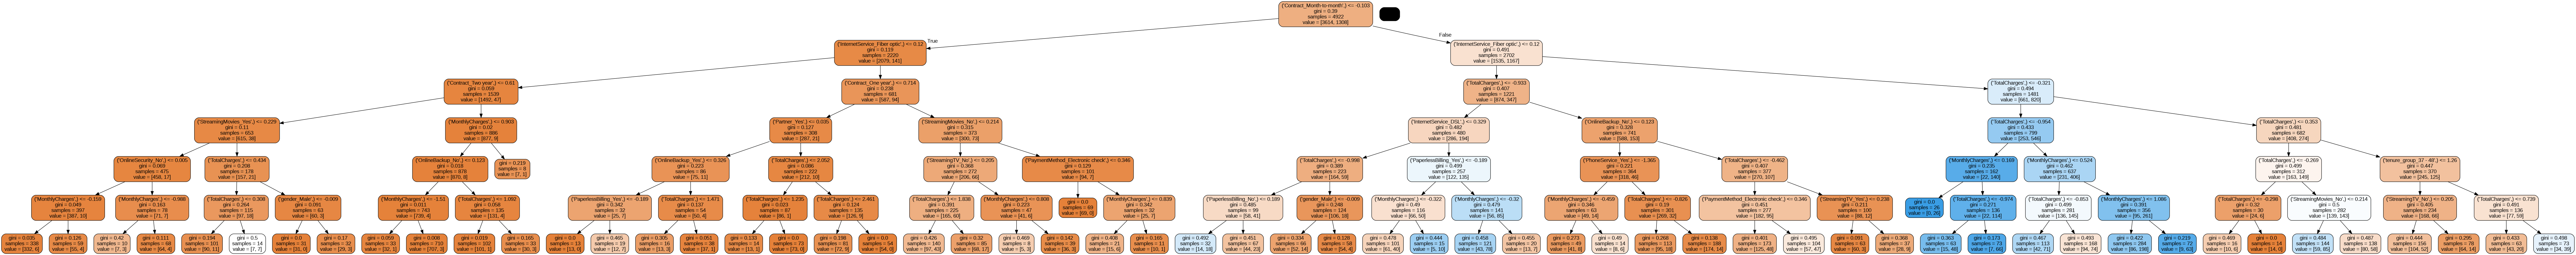

In [62]:
feature_name=list(X_train.columns)
# create a dot_file which stores the tree structure
dot_data = export_graphviz(model_dt_clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

## **Model Evaluation**

### **1.Accuracy Score**

In [63]:
from sklearn.metrics import accuracy_score

# Accuracy score on training data:
X_train_pred = model_dt_clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)

# Printing the Accuracy
print('Accuracy on training data: {}%'.format(round((training_data_accuracy*100),2)))

Accuracy on training data: 81.31%


In [64]:
# Accuracy on the test data:
X_test_pred = model_dt_clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)

# Printing the Accuracy
print('Accuracy on test data: {}%'.format(round((test_data_accuracy*100),2)))

Accuracy on test data: 77.96%


### **2.Confusion Matrix**

In [65]:
from sklearn.metrics import confusion_matrix
cm_model1 = confusion_matrix(y_test, X_test_pred)

print(cm_model1)

[[1383  166]
 [ 299  262]]


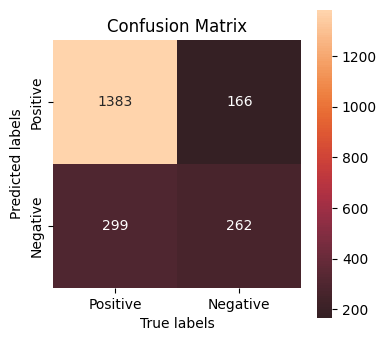

In [66]:
plt.figure(figsize=(4,4))
# Configure plot
ax = plt.subplot()
sns.heatmap(cm_model1, square=True, center=True, annot=True, ax=ax, fmt='.0f')  # Annotate cells with values

# Set labels and title
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.yaxis.set_ticklabels(['Positive', 'Negative'])
ax.xaxis.set_ticklabels(['Positive', 'Negative'])

plt.show()

### **Insights:**
- True Positive = 1383 *(They are actually true and we predicted true)*
- True Negative = 262 *(They are actually False and we predicted False)*
- False Positve = 299 *(They are actually False but we predicted True)* **Type I Error/Overestimation/False Alarm**
- False Negative = 166 *(They are actually True but we predicted False)* **Type II Error/Underestimation/Miss**



### **3.Classification Report**

In [67]:
from sklearn.metrics import classification_report
cr_model1 = classification_report(y_test, X_test_pred)

print(cr_model1)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



### **Insights:**
- As the data is highly imbalanced so we witness low precision, low recall and low f1-score.
- Accuracy is cursed for a highly imbalanced data.

### **4.Area under ROC**

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1, tpr_model1, threshold_model1 = roc_curve(y_test, X_test_pred)
print('roc_auc_score_model1: ',roc_auc_score(y_test, X_test_pred))

roc_auc_score_model1:  0.6799286297064749


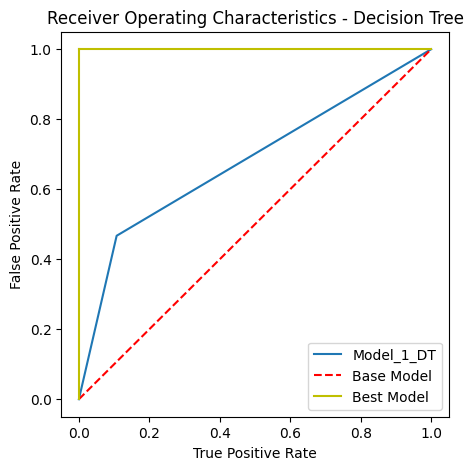

In [69]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristics - Decision Tree')
plt.plot(fpr_model1, tpr_model1, label="Model_1_DT")
plt.plot([0,1],ls="--",c='red', label="Base Model")
plt.plot([1,1],c='y'),plt.plot([0,0],[1,0],c='y',label='Best Model')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

### **5.Log Loss**

In [70]:
from sklearn.metrics import log_loss
ll_model1 = log_loss(y_test,X_test_pred)

ll_model1  #more loss-worst model, less loss-best model.

7.943269585753306

## **Imbalanced Data Treatment**

- Synthetic Minority Oversampling Technique **(SMOTE)**

In [71]:
X_train.shape, y_train.shape

((4922, 50), (4922,))

In [83]:
from imblearn.combine import SMOTEENN

# Oversample the minority class using SMOTEENN
sm = SMOTEENN(random_state=42)
Xr_train, yr_train = sm.fit_resample(X_train, y_train)

# Print the shapes of the original and resampled data
print("Original data shape:", X_train.shape)
print("Resampled data shape:", Xr_train.shape)

Original data shape: (4922, 50)
Resampled data shape: (4511, 50)


In [74]:
# Model Training
model_dt_clf.fit(Xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [75]:
# Target Prediction using Model on Training Data
Xr_train_pred = model_dt_clf.predict(Xr_train)

# Target Prediction using Model on Test Data
X_test_pred = model_dt_clf.predict(X_test)

In [76]:
# Model Evaluatiion - Classification Report
from sklearn.metrics import classification_report
cr_model = classification_report(y_test, X_test_pred)

print(cr_model)

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1549
           1       0.45      0.81      0.58       561

    accuracy                           0.69      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.78      0.69      0.70      2110



In [77]:
# ROC- AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model, tpr_model, threshold_model = roc_curve(y_test, X_test_pred)
print('roc_auc_score_model: ',roc_auc_score(y_test, X_test_pred))

roc_auc_score_model:  0.7275149627900928


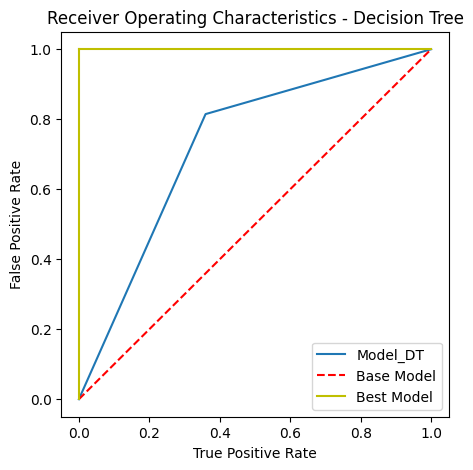

In [78]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristics - Decision Tree')
plt.plot(fpr_model, tpr_model, label="Model_DT")
plt.plot([0,1],ls="--",c='red', label="Base Model")
plt.plot([1,1],c='y'),plt.plot([0,0],[1,0],c='y',label='Best Model')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [79]:
# Accuracy on the test data
test_data_accuracy = accuracy_score(X_test_pred, y_test)

print('Accuracy on test data: {}%'.format(round((test_data_accuracy*100),2)))

Accuracy on test data: 68.67%


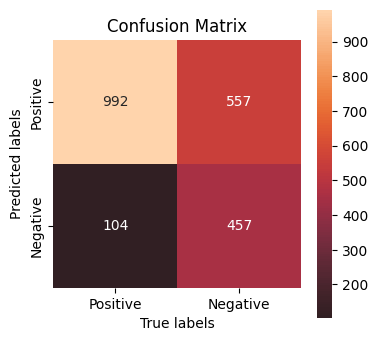

In [80]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_model = confusion_matrix(y_test, X_test_pred)

plt.figure(figsize=(4,4))
# Configure plot
ax = plt.subplot()
sns.heatmap(cm_model, square=True, center=True, annot=True, ax=ax, fmt='.0f')  # Annotate cells with values

# Set labels and title
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.yaxis.set_ticklabels(['Positive', 'Negative'])
ax.xaxis.set_ticklabels(['Positive', 'Negative'])

plt.show()